# Making a Topographical Map using Python
## Reyann Larkey
### 2-17-2020

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
%matplotlib notebook

# GPS Data
### Downloaded from Strava

In [122]:
df = pd.read_csv("data/Mount_Blackmore.csv") # my GPS for the hike
df.head()

,Longitude,Latitude,Altitude,Time,Speed,points
0,-110.983176,45.489310,2035.8,0.0,0.394188,"(45.48931, -110.983176)"
1,-110.983170,45.489338,2035.7,8.0,0.321245,"(45.489338, -110.98317)"
2,-110.983215,45.489349,2035.9,23.0,0.196509,"(45.489349, -110.983215)"
3,-110.983223,45.489317,2036.0,48.0,0.508822,"(45.489317, -110.983223)"
4,-110.983210,45.489287,2036.1,52.0,1.030080,"(45.489287, -110.98321)"


# Topographical Data
### Data was taken from the USGS: https://www.sciencebase.gov/catalog/item/5a68b42fe4b06e28e9c70461

You actually need to stitch together two different datasets for this, that's the first step. These datasets are titled:
* 'USGS NED 1/3 arc-second Contours for Bozeman E, Montana 20180211 1 X 1 degree Shapefile'
* 'USGS NED 1/3 arc-second Contours for Bozeman W, Montana 20180211 1 X 1 degree Shapefile'

In [125]:
shapefileW = gpd.read_file("data/ELEV_DATA/ShapeW/Elev_Contour.shp")
shapefileW.head()

,DATA_SECUR,CONTOURUNI,CONTOURINT,DISTRIBUTI,SOURCE_DAT,CONTOURELE,SOURCE_ORI,LOADDATE,PERMANENT_,SOURCE_FEA,SOURCE_D_1,FCODE,SHAPE_LENG,geometry
0,5,1,40,E4,823b5714-39b4-4503-a9a8-b7837b737bfd,7680.0,US Geological Survey,2017-03-14,662f0668-ac40-45e0-a275-ff5d98c4cef8,None,Contours derived from the National Elevation D...,10101,0.000400,"LINESTRING (-112.00000 45.11232, -111.99994 45..."
1,5,1,40,E4,823b5714-39b4-4503-a9a8-b7837b737bfd,7680.0,US Geological Survey,2017-03-14,ba70eef4-6f78-418f-ac48-3ceb7448e5cf,None,Contours derived from the National Elevation D...,10101,0.001512,"LINESTRING (-112.00000 45.01222, -111.99988 45..."
2,5,1,40,E4,823b5714-39b4-4503-a9a8-b7837b737bfd,7240.0,US Geological Survey,2017-03-14,589ccd6f-a9cf-42c2-98f2-f1e44e0d4380,None,Contours derived from the National Elevation D...,10101,0.005545,"LINESTRING (-112.00000 45.09522, -111.99953 45..."
3,5,1,40,E4,823b5714-39b4-4503-a9a8-b7837b737bfd,7560.0,US Geological Survey,2017-03-14,b3deb7f0-fcc4-4f57-8d2b-5991df6903db,None,Contours derived from the National Elevation D...,10101,0.003623,"LINESTRING (-112.00000 45.02399, -111.99877 45..."
4,5,1,40,E4,823b5714-39b4-4503-a9a8-b7837b737bfd,7360.0,US Geological Survey,2017-03-14,bb496ae6-0037-40ac-a439-9ca8c40ad52e,None,Contours derived from the National Elevation D...,10101,0.008705,"LINESTRING (-112.00000 45.02587, -111.99965 45..."


In [127]:
shapefileE = gpd.read_file("data/ELEV_DATA/ShapeE/Elev_Contour.shp")
shapefileE.head()

,DATA_SECUR,CONTOURUNI,CONTOURINT,DISTRIBUTI,SOURCE_DAT,CONTOURELE,SOURCE_ORI,LOADDATE,PERMANENT_,SOURCE_FEA,SOURCE_D_1,FCODE,SHAPE_LENG,geometry
0,5,1,40,E4,6a9b8682-533c-4864-b22b-27e9fc29adcf,8440.0,US Geological Survey,2017-03-14,6097076f-76c8-4431-99b7-13dbf757f644,None,Contours derived from the National Elevation D...,10101,0.002278,"LINESTRING (-111.00000 45.08317, -110.99996 45..."
1,5,1,40,E4,6a9b8682-533c-4864-b22b-27e9fc29adcf,9040.0,US Geological Survey,2017-03-14,7635df7e-82ad-4f42-a622-bb5149870094,None,Contours derived from the National Elevation D...,10101,0.002759,"LINESTRING (-111.00000 45.09218, -110.99999 45..."
2,5,1,40,E4,6a9b8682-533c-4864-b22b-27e9fc29adcf,7560.0,US Geological Survey,2017-03-14,ed7e91f5-1bb9-4456-a472-8f723e18b256,None,Contours derived from the National Elevation D...,10101,0.008997,"LINESTRING (-111.00000 45.12331, -110.99997 45..."
3,5,1,40,E4,6a9b8682-533c-4864-b22b-27e9fc29adcf,7640.0,US Geological Survey,2017-03-14,cd4a865d-26c4-4d29-bc46-bd89b9a2186a,None,Contours derived from the National Elevation D...,10101,0.012123,"LINESTRING (-111.00000 45.12374, -110.99999 45..."
4,5,1,40,E4,6a9b8682-533c-4864-b22b-27e9fc29adcf,9680.0,US Geological Survey,2017-03-14,7318a1ed-4675-4eeb-9857-7226287326c7,None,Contours derived from the National Elevation D...,10101,0.022125,"LINESTRING (-111.00000 45.10734, -110.99969 45..."


# Need to get the x and y coordinates from the LINESTRING elements in the "geometry" categories

## This process can take a while

In [137]:
def get_coords(shapefile_df):
    topo_df = pd.DataFrame(columns = ['x','y','z'])
    for i, row in shapefile_df.iterrows():
        if i<shapefile_df.shape[0]+1:

            try:
                x, y = row.geometry.xy
                x, y= np.asarray(x), np.asarray(y)
                mask = (x>-111.05) & (x<-110.976) & (y>45.43) & (y<45.5)

                x,y = x[mask], y[mask]
        # #         print(x,y)
                z = row.CONTOURELE

                z = np.ones(shape = len(x))*z


                location_df = pd.DataFrame(data = {'x':x, 'y':y, 'z':z})
                topo_df = topo_df.append(location_df, ignore_index = True)
    #             ax.plot(x, y, z, color = 'blue')
            except: 
                pass
        else:
            break
    return topo_df

In [139]:
# get the data frames and save to csvs so I don't have to do this step again:

topo_df_E = get_coords(shapefileE)
topo_df_W = get_coords(shapefileW)

topo_df_E.to_csv("data/topo_df_E.csv", index = False)
topo_df_W.to_csv("data/topo_df_W.csv", index = False)

In [140]:
topo_df_full = topo_df_E.append(topo_df_W, ignore_index =True)

In [143]:
topo_df_full.head()

,x,y,z
0,-110.987457,45.430208,9360.0
1,-110.987143,45.430486,9360.0
2,-110.986949,45.430718,9360.0
3,-110.986814,45.430949,9360.0
4,-110.986656,45.431458,9360.0


In [144]:
topo_df_full = topo_df_full.sample(frac = 0.5) # sub sample the dataframe because its a *lot* of data

<IPython.core.display.Javascript object>


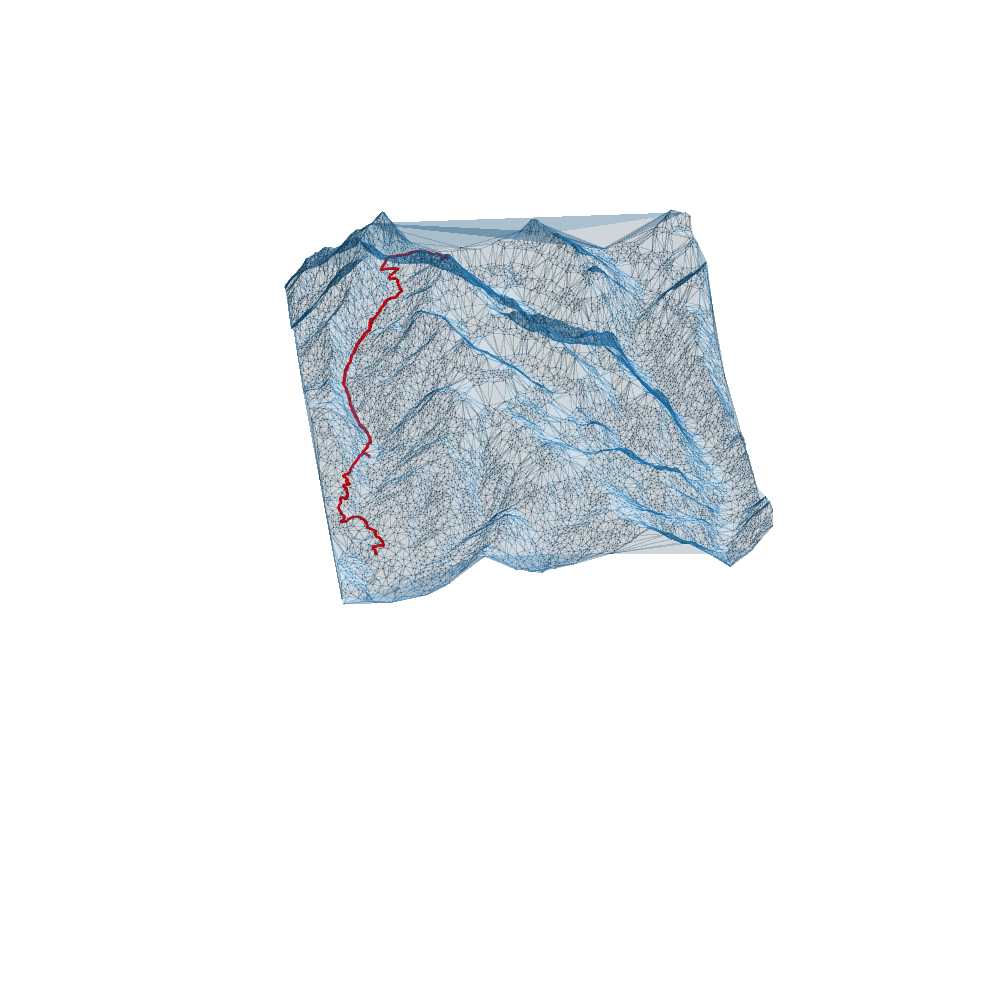

In [145]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

ax.plot_trisurf(topo_df_full.x, topo_df_full.y, topo_df_full.z, linewidth=0, antialiased=False,
                edgecolor = None, alpha = 0.2)

ax.plot(df.Longitude, df.Latitude, df.Altitude*3.281, color = 'red') # convert to meters
ax.set_xlim(-111.05, -110.976)
ax.set_ylim(45.43, 45.5)
ax.set_zlim(0, 10000)
plt.axis("off")
ax.view_init(elev=40., azim=80)

# Make the movie

## This can take quite a while. It produces 360 .png files that I then made into a .gif using this website: https://ezgif.com/maker

### You can also totally make the gif in Python, but I chose not to spend a ton of time on that


<IPython.core.display.Javascript object>


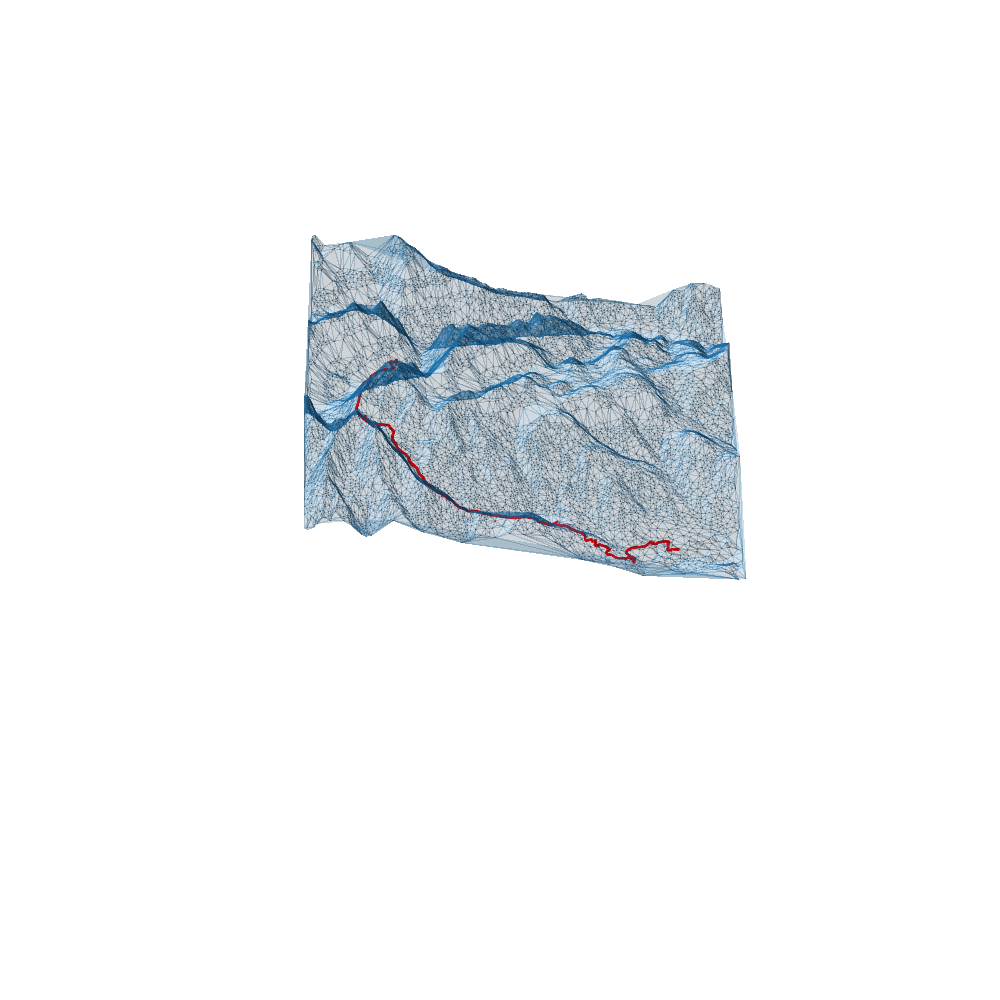

In [150]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

ax.plot_trisurf(topo_df_full.x, topo_df_full.y, topo_df_full.z, linewidth=0, antialiased=False,
                edgecolor = None, alpha = 0.2)

ax.plot(df.Longitude, df.Latitude, df.Altitude*3.281, color = 'red') # convert to meters
ax.set_xlim(-111.05, -110.976)
ax.set_ylim(45.43, 45.5)
ax.set_zlim(0, 10000)
plt.axis("off")
# rotate the viewing angle and save the png each time:
for ii in range(0,360,1):
    ax.view_init(elev=40., azim=ii)
    plt.savefig(f"img/pngs/movie{ii}.png", bbox_inches = 'tight')


# End Result:

![SegmentLocal](img/map_gif.gif "segment")